In [130]:
# importing the necessary libraries
# from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


0    500
1    268
Name: Outcome, dtype: int64


<AxesSubplot:>

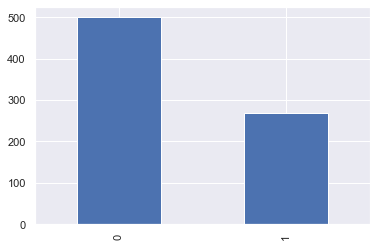

In [241]:
print(dataset_copy.Outcome.value_counts())
dataset_copy.Outcome.value_counts().plot.bar()

In [ ]:
#The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. 
#The number of non-diabetics is almost twice the number of diabetic patients

In [5]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

DataFrame.describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:

- count tells us the number of NoN-empty rows in a feature.
- mean tells us the mean value of that feature.
- std tells us the Standard Deviation Value of that feature.
- min tells us the minimum value of that feature.
- 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
- max tells us the maximum value of that feature.

In [8]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [17]:
dataset_copy = dataset.copy() 

In [20]:
dataset_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = dataset_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.NaN) 
# On these columns, a value of zero does not make sense and thus indicates missing value.
# Following columns or variables have an invalid zero value: 1. Glucose 2. BloodPressure 3. SkinThickness 4. Insulin 5. BMI
#It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [21]:
dataset_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


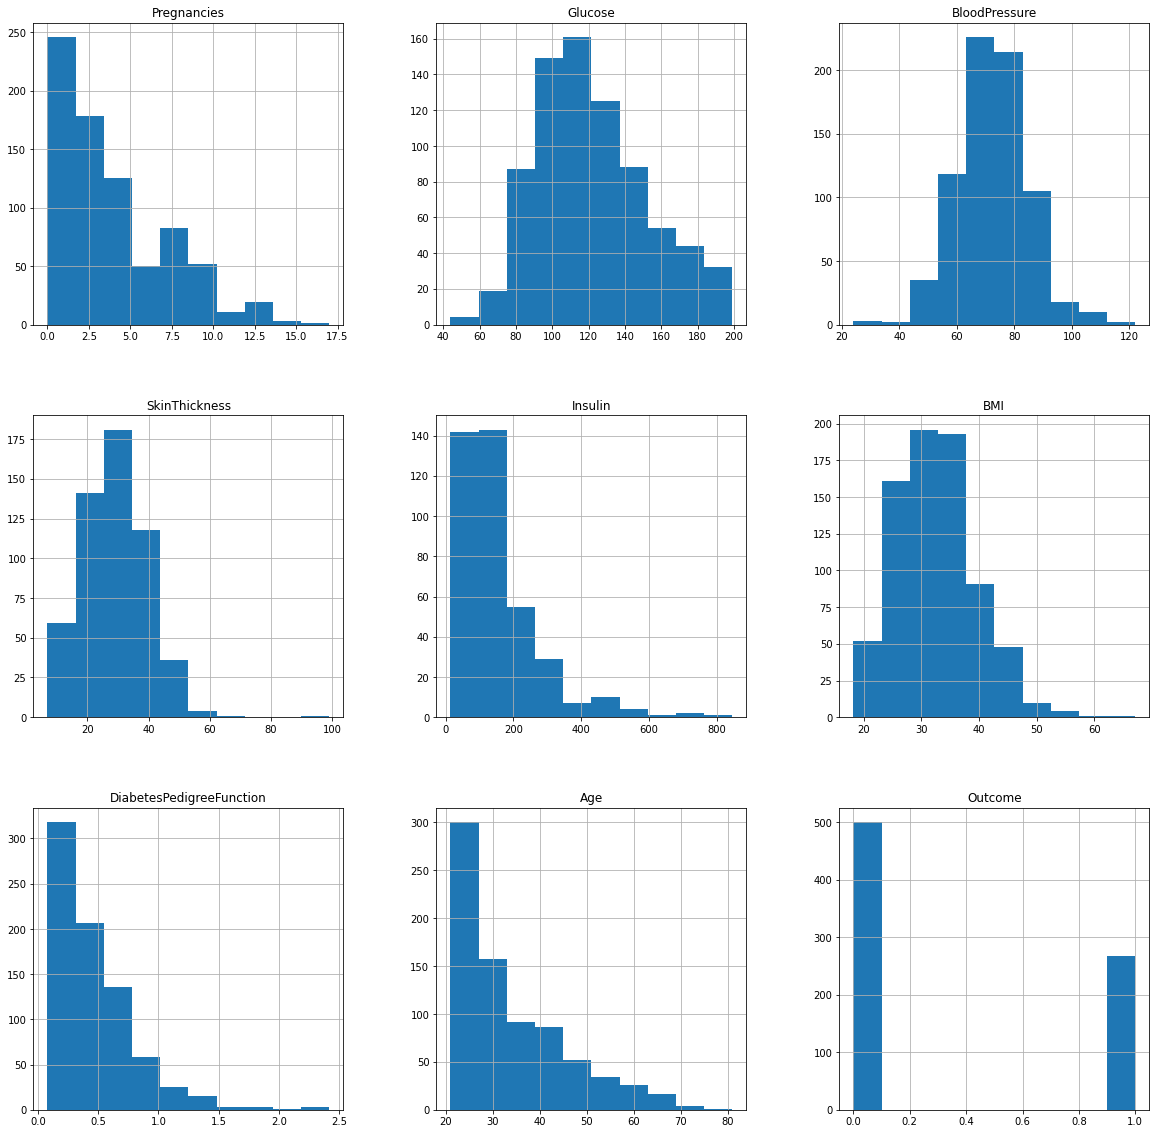

In [23]:
dist = dataset_copy.hist(figsize = (20,20))

In [24]:
dataset_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [46]:
# None value impute nan values for the columns in accordance with their distribution
dataset_copy['Glucose'].fillna(dataset_copy['Glucose'].mean(), inplace = True)
dataset_copy['BloodPressure'].fillna(dataset['BloodPressure'].mean(), inplace = True)
dataset_copy['SkinThickness'].fillna(dataset_copy['SkinThickness'].median(), inplace = True)
dataset_copy['Insulin'].fillna(dataset_copy['Insulin'].median(), inplace = True)
dataset_copy['BMI'].fillna(dataset_copy['BMI'].median(),inplace = True)


In [47]:
dataset_copy.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [33]:
dataset_copy.shape

(768, 9)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

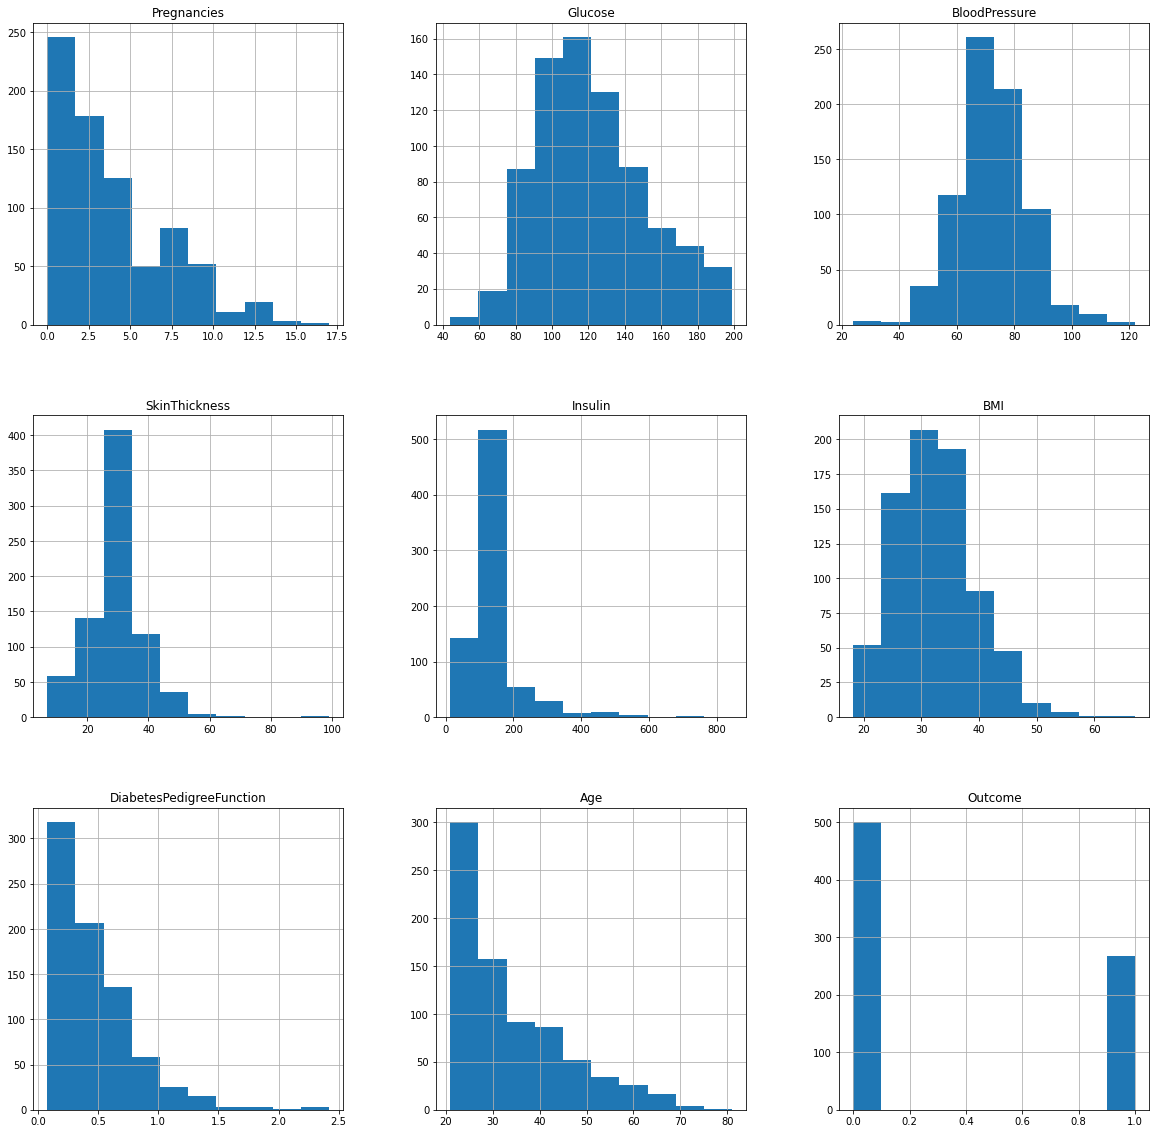

In [51]:
dataset_copy.hist(figsize=(20,20)) # Ploting after filling the none value

In [52]:
dataset_copy.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

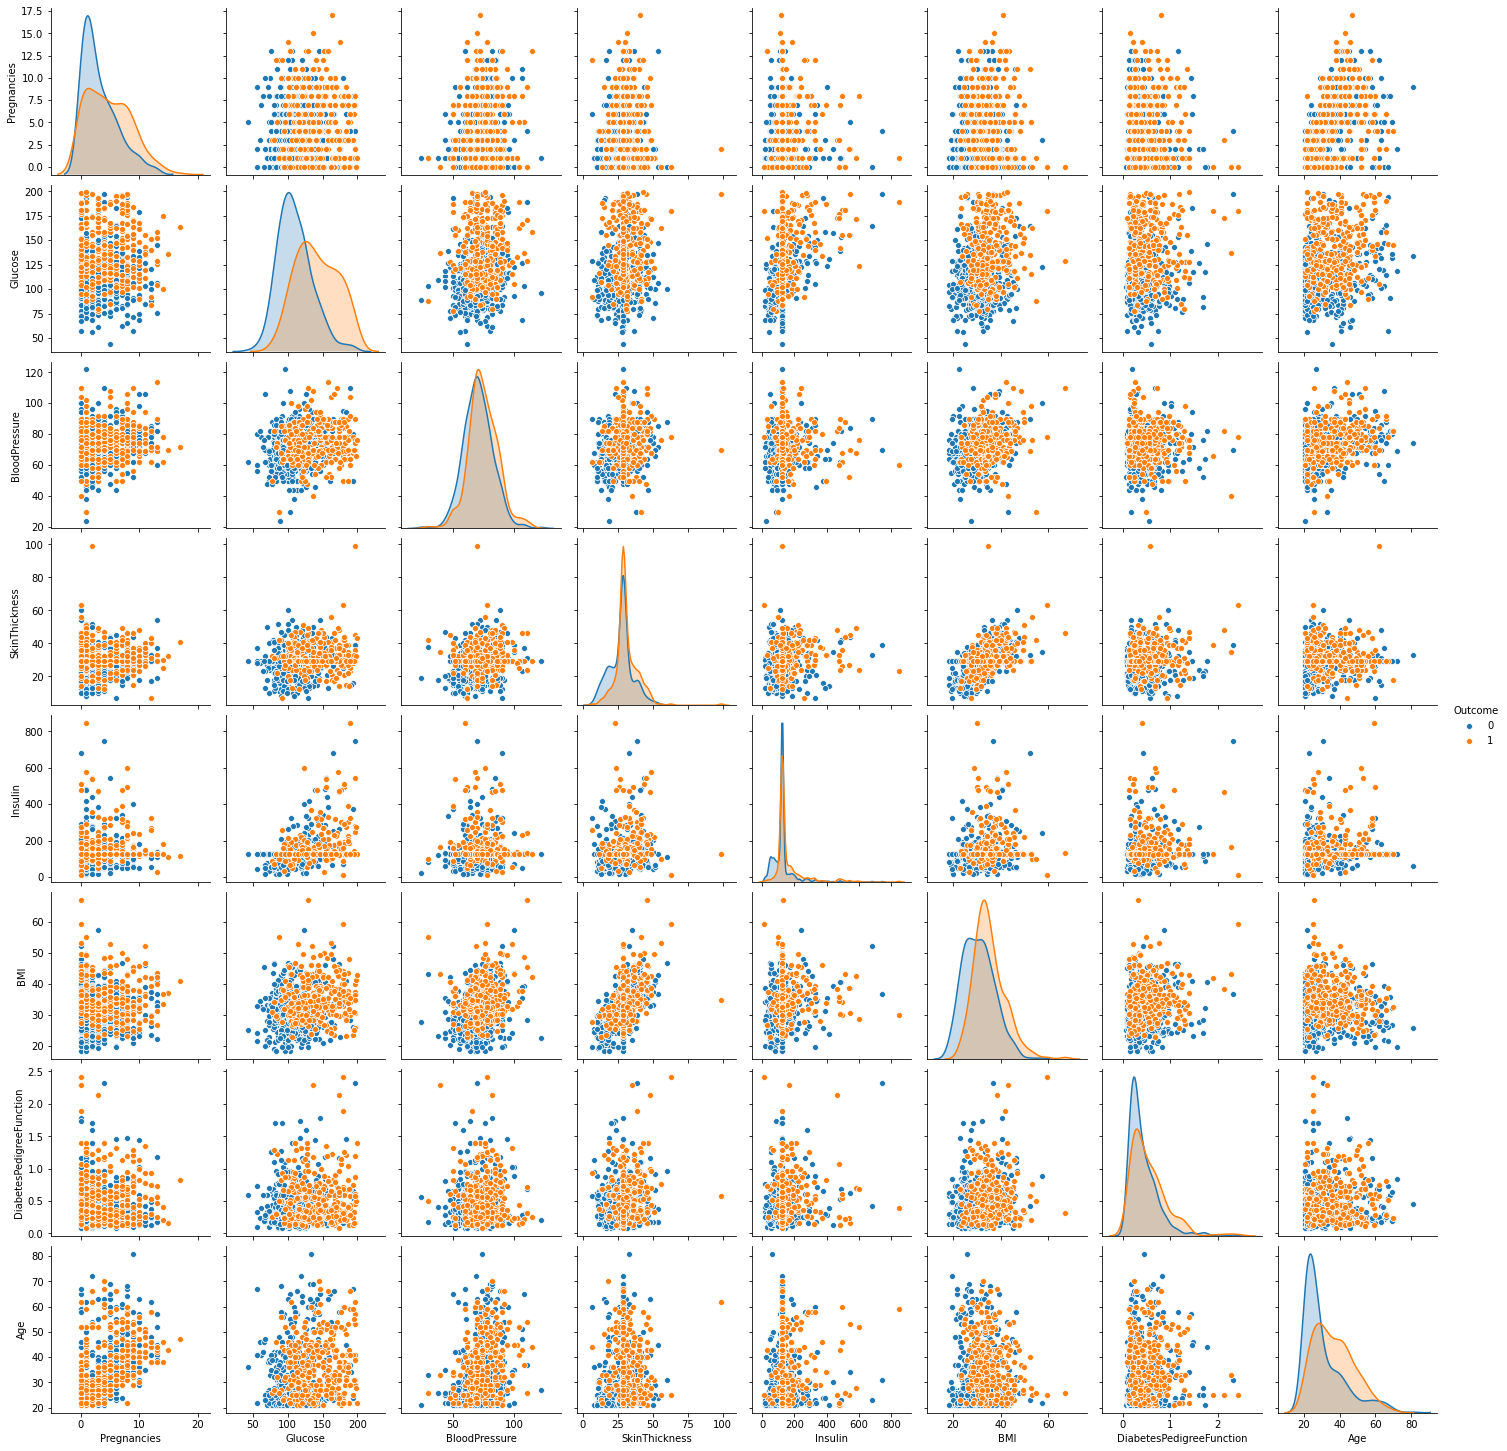

In [55]:
import seaborn as sns
p = sns.pairplot(dataset_copy, hue = 'Outcome')

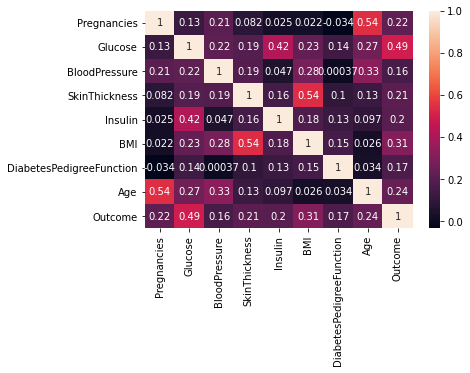

In [62]:
p = sns.heatmap(dataset_copy.corr(), annot = True)  # on this line I just set the size of figure to 12 by 10.


In [ ]:
#Pearson's Correlation Coefficient: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables.
#The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

#A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

In [105]:
#Test Train Split and Cross Validation methods
#Train Test Split : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained.
#This helps capture the model performance much better.
#Cross Validation: When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly.
#Hence over-fitting and underfitting problems can be well avoided with cross validation techniques
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X= dataset_copy.drop('Outcome', axis = 1)
Y= dataset_copy['Outcome']
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, stratify=Y)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(537, 8)
(231, 8)
(537,)
(231,)


In [106]:
def correlation(data, thres):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>thres:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_feature = correlation(X_train, 0.90)
print(corr_feature)
X_train.drop(corr_feature)
X_test.drop(corr_feature)

set()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
406,4,115.0,72.000000,29.0,125.0,28.9,0.376,46
285,7,136.0,74.000000,26.0,135.0,26.0,0.647,51
601,6,96.0,69.105469,29.0,125.0,23.7,0.190,28
414,0,138.0,60.000000,35.0,167.0,34.6,0.534,21
331,2,87.0,58.000000,16.0,52.0,32.7,0.166,25
...,...,...,...,...,...,...,...,...
208,1,96.0,64.000000,27.0,87.0,33.2,0.289,21
678,3,121.0,52.000000,29.0,125.0,36.0,0.127,25
468,8,120.0,69.105469,29.0,125.0,30.0,0.183,38
333,12,106.0,80.000000,29.0,125.0,23.6,0.137,44


In [107]:
#Scaling the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [155]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
test_score = []
train_score = []
for i in range(1,15):
    knn= KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    y_pred = knn.predict(X_test)
    
    print(accuracy_score(Y_test, y_pred))
        
    
    train_score.append(knn.score(X_train,Y_train))
    test_score.append(knn.score(X_test,Y_test))
    

0.6883116883116883
0.7359307359307359
0.7316017316017316
0.7272727272727273
0.7186147186147186
0.7186147186147186
0.7272727272727273
0.7229437229437229
0.7316017316017316
0.7316017316017316
0.7316017316017316
0.7272727272727273
0.7186147186147186
0.7229437229437229


In [156]:
train_score

[1.0,
 0.8491620111731844,
 0.8603351955307262,
 0.8175046554934823,
 0.813780260707635,
 0.8119180633147114,
 0.8212290502793296,
 0.8156424581005587,
 0.813780260707635,
 0.8026070763500931,
 0.8100558659217877,
 0.8026070763500931,
 0.8081936685288641,
 0.8044692737430168]

In [157]:
test_score

[0.6883116883116883,
 0.7359307359307359,
 0.7316017316017316,
 0.7272727272727273,
 0.7186147186147186,
 0.7186147186147186,
 0.7272727272727273,
 0.7229437229437229,
 0.7316017316017316,
 0.7316017316017316,
 0.7316017316017316,
 0.7272727272727273,
 0.7186147186147186,
 0.7229437229437229]

In [158]:
max_training_score = max(train_score)
train_scores_ind = [i for i, v in enumerate(train_score) if v == max_training_score]
print('Max train score {} % and k = {}'.format(max_training_score*100,list(map(lambda x: x+1, train_scores_ind))))


Max train score 100.0 % and k = [1]


In [159]:
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 73.59307359307358 % and k = [2]


In [160]:
max(test_score)

0.7359307359307359

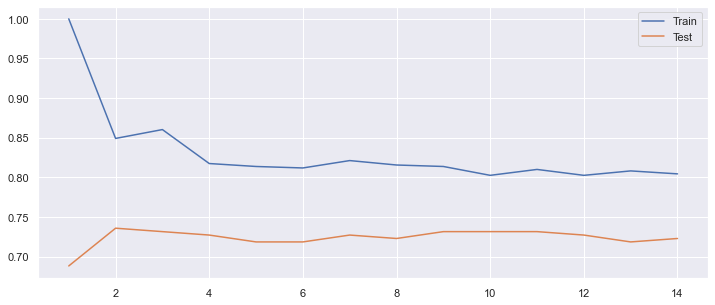

In [161]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15), train_score, label = 'Train' )
p = sns.lineplot(range(1,15), test_score, label = 'Test')

In [178]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
accuracy_score(Y_test, y_pred)

0.7229437229437229

In [196]:
knn = KNeighborsClassifier(22)

knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.7445887445887446

In [ ]:
#The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.

In [200]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above. Creating the confusion Matrix
y_pred = knn.predict(X_test)
confusion_matrix(Y_test,y_pred)

array([[135,  15],
       [ 44,  37]], dtype=int64)

In [243]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       150
           1       0.64      0.52      0.57        81

    accuracy                           0.73       231
   macro avg       0.70      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231



In [202]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
y_pred_proba

array([0.40909091, 0.5       , 0.13636364, 0.45454545, 0.        ,
       0.13636364, 0.22727273, 0.        , 0.68181818, 0.77272727,
       0.        , 0.54545455, 0.45454545, 0.27272727, 0.63636364,
       0.36363636, 0.36363636, 0.04545455, 0.86363636, 0.04545455,
       0.59090909, 0.31818182, 0.13636364, 0.45454545, 0.09090909,
       0.5       , 0.        , 0.63636364, 0.18181818, 0.5       ,
       0.        , 0.18181818, 0.81818182, 0.31818182, 0.27272727,
       0.22727273, 0.04545455, 0.36363636, 0.13636364, 0.81818182,
       0.13636364, 0.63636364, 0.45454545, 0.5       , 0.31818182,
       0.54545455, 0.5       , 0.45454545, 0.5       , 0.31818182,
       0.31818182, 0.81818182, 0.54545455, 0.5       , 0.40909091,
       0.13636364, 0.5       , 0.31818182, 0.68181818, 0.45454545,
       0.22727273, 0.13636364, 0.40909091, 0.22727273, 0.45454545,
       0.09090909, 0.36363636, 0.81818182, 0.        , 0.09090909,
       0.54545455, 0.81818182, 0.68181818, 0.36363636, 0.     

In [203]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
print('FPR')
print(fpr)
print('TPR')
print(tpr)
print('Thresholds')
print(thresholds)

FPR
[0.         0.00666667 0.01333333 0.01333333 0.02       0.02
 0.06       0.06666667 0.1        0.16       0.2        0.22666667
 0.30666667 0.38       0.4        0.5        0.57333333 0.68666667
 0.74       0.83333333 1.        ]
TPR
[0.         0.02469136 0.11111111 0.19753086 0.25925926 0.32098765
 0.37037037 0.41975309 0.45679012 0.58024691 0.66666667 0.71604938
 0.79012346 0.87654321 0.9382716  0.9382716  0.96296296 0.98765432
 0.98765432 0.98765432 1.        ]
Thresholds
[1.86363636 0.86363636 0.81818182 0.77272727 0.72727273 0.68181818
 0.63636364 0.59090909 0.54545455 0.5        0.45454545 0.40909091
 0.36363636 0.31818182 0.27272727 0.22727273 0.18181818 0.13636364
 0.09090909 0.04545455 0.        ]


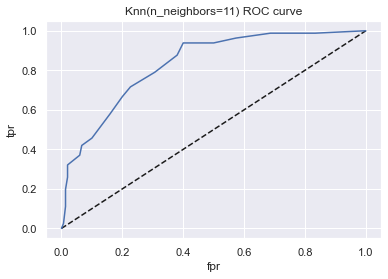

In [204]:
# Plotting the ROC Curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [206]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_pred_proba)

0.8316872427983539

In [244]:
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(X,Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [220]:
print('best Score '+ str(knn_cv.best_score_))
print('best Prams '+ str(knn_cv.best_params_))


best Score 0.7514183185235817
best Prams {'n_neighbors': 10}


In [221]:
from sklearn.ensemble import RandomForestClassifier

In [223]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred = rf.predict(X_test)

In [225]:
from sklearn  import metrics
print('Accuracy : ', metrics.accuracy_score(Y_test, y_pred))

Accuracy :  0.7272727272727273


In [231]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [234]:
clf = xgboost.XGBClassifier()

random_search=RandomizedSearchCV(clf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)


In [237]:
random_search.fit(X_train,Y_train.ravel())
classifier = random_search.best_estimator_


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.9s remaining:    0.3s


[17:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.3s finished


In [238]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,Y.ravel(),cv=10)


[17:42:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:42:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:42:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:42:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [240]:
score.mean()

0.7474025974025974